## Introduction To Machine Learning - Case Study II

Module 3 – Introduction to Machine Learning with Python

Case Study

Objectives:
1.Provide the learner some more practice for exploratory data analysis.
2.Equip the learner to fit and evaluate a linear regression model.

Questions:

1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.
[Hint: Extract values of a specific column using their labels and use hist method of pyplot ]

2. The names of the manufactures are coded using alphabets, create a new column with their full name using the below mapping.
'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'
Create a bar plot where each manufacturer is on the y axis and the height of the bars depict the number of cereals manufactured by them.
[Hint: Try using countplot this time or bar method of pyplot]

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.
4. Fit a linear regression module and measure the mean squared error on test dataset.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tuhin.samanta\AppData\Local\conda\conda\envs\testenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\tuhin.samanta\AppData\Local\conda\conda\envs\testenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\tuhin.samanta\AppData\Local\conda\conda\envs\testenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
dfcerial = pd.read_csv('cereal.csv')

In [6]:
dfcerial.shape

(77, 16)

In [7]:
dfcerial.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67,41.015492
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074
13,Clusters,G,C,110,3,2,140,2.0,13.0,7,105,25,3,1.00,0.50,40.400208
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.00,1.00,41.503540


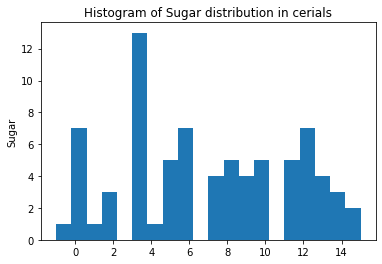

In [8]:
plt.hist(dfcerial['sugars'],bins=20)
plt.ylabel("Sugar")
plt.title('Histogram of Sugar distribution in cerials')
plt.show()

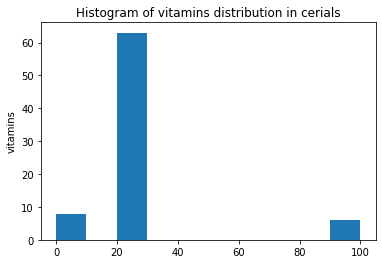

In [9]:
plt.hist(dfcerial['vitamins'],bins=10)
plt.ylabel("vitamins")
plt.title('Histogram of vitamins distribution in cerials')
plt.show()

In [10]:
dfcerial.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
mfrcntlst=[]
for mfr,group in dfcerial.groupby('mfr'):
    mfrcntlst.append([mfr,len(group)])
dfmfr = pd.DataFrame(mfrcntlst, columns=['mfr','counts'])

In [12]:
dfcerial['mfr'].value_counts()

K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: mfr, dtype: int64

In [13]:
dfmfr

,mfr,counts
0,A,1
1,G,22
2,K,23
3,N,6
4,P,9
5,Q,8
6,R,8


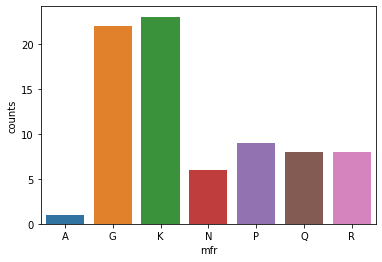

In [14]:
sns.barplot(x='mfr',y='counts',data=dfmfr)

3. Extract the rating as your target variable ‘y’ and all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.
4. Fit a linear regression module and measure the mean squared error on test dataset.

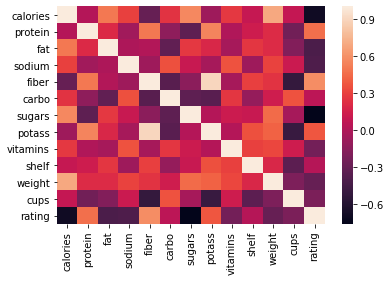

In [15]:
sns.heatmap(dfcerial.corr())
plt.show()

In [17]:
dfcerial.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


In [3]:
from sklearn.model_selection import train_test_split

In [143]:
features = ['protein','fiber','potass','carbo','shelf']
X = dfcerial[features]

In [144]:
X.isna().count()

protein    77
fiber      77
potass     77
carbo      77
shelf      77
dtype: int64

In [145]:
y = dfcerial.rating

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lrm = LinearRegression()

In [149]:
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
pred_y = lrm.predict(X_test)

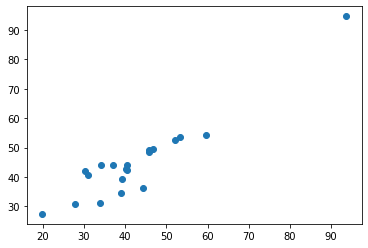

In [151]:
plt.scatter(y_test,pred_y)

In [152]:
from sklearn.metrics import mean_squared_error

In [153]:
mse = mean_squared_error(y_test,pred_y)

In [154]:
mse

30.625987762946785

In [155]:
y_test,pred_y

(40    39.241114
 36    31.072217
 72    39.106174
 3     93.704912
 46    30.313351
 44    37.136863
 1     33.983679
 12    19.823573
 16    45.863324
 19    40.448772
 71    46.658844
 33    53.371007
 45    34.139765
 47    40.105965
 62    40.560159
 32    52.076897
 50    59.642837
 23    44.330856
 73    27.753301
 34    45.811716
 Name: rating, dtype: float64,
 array([39.21588239, 40.64554359, 34.44763907, 94.65286338, 42.01498405,
        44.0272257 , 31.24034306, 27.45435711, 49.10147766, 43.91435408,
        49.38851913, 53.4725689 , 44.0272257 , 42.80891369, 42.33938304,
        52.67005962, 54.28302299, 36.31522982, 30.72795278, 48.59395468]))

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2